2024/03/21 과제
알파벳을 사용하는 언어들 각각은, 문장에서 각 문장이 차지하는 패턴이 다를 것이다.
특정 문장을 입력했을 때 이 문장의 언어가 무엇일지 맞추는 모델을 만들자.

(1) 데이터 전처리

In [1]:
import os

def certain_type_in_dir(my_folder, extension):
    # 원하는 확장자의 파일 경로만을 모아서 리스트로 반환하는 함수
    # data_type 예시 : csv, jpg, png, txt, ...
    if not my_folder.endswith('/'):
        my_folder += '/'
    if not extension.startswith('.'):
        extension = '.' + extension
    
    filelist = []
    datalist = os.listdir(my_folder)
    for data_name in datalist:
        if os.path.isdir(my_folder + data_name):
            filelist.extend(certain_type_in_dir(my_folder + data_name + '/', extension))
        else:
            # if os.path.splitext(data_name)[-1] == (data_type):
            #     print(data_name)
            if data_name.endswith(extension):
                filelist.append(my_folder + data_name)
    return filelist

In [2]:
certain_type_in_dir('./train', 'txt')

['./train/en-1.txt',
 './train/en-10.txt',
 './train/en-2.txt',
 './train/en-3.txt',
 './train/en-4.txt',
 './train/en-5.txt',
 './train/en-6.txt',
 './train/en-7.txt',
 './train/en-8.txt',
 './train/en-9.txt',
 './train/fr-1.txt',
 './train/fr-10.txt',
 './train/fr-2.txt',
 './train/fr-3.txt',
 './train/fr-4.txt',
 './train/fr-5.txt',
 './train/fr-6.txt',
 './train/fr-7.txt',
 './train/fr-8.txt',
 './train/fr-9.txt',
 './train/id-11.txt',
 './train/id-12.txt',
 './train/id-13.txt',
 './train/id-14.txt',
 './train/id-15.txt',
 './train/id-16.txt',
 './train/id-17.txt',
 './train/id-18.txt',
 './train/id-19.txt',
 './train/id-20.txt',
 './train/tl-11.txt',
 './train/tl-12.txt',
 './train/tl-13.txt',
 './train/tl-14.txt',
 './train/tl-15.txt',
 './train/tl-16.txt',
 './train/tl-17.txt',
 './train/tl-18.txt',
 './train/tl-19.txt',
 './train/tl-20.txt']

In [3]:
import re

def split_string_by_punctuation(text):
    # 온점, 느낌표, 물음표를 기준으로 문자열 분리
    split_text = re.split(r'[.!?]', text)   # 정규 표현식 사용
    
    # 공백 제거 및 빈 문자열 제거
    # 빈 문자열이라면 phrase.strip()이 False
    split_text = [phrase.strip() for phrase in split_text if phrase.strip()]
    
    return split_text

# 예시 문자열
text = "Hello, World! How are you? I'm fine. Thanks!"

# 문자열을 온점, 느낌표, 물음표를 기준으로 나누기
splitted_text = split_string_by_punctuation(text)
print(splitted_text)

['Hello, World', 'How are you', "I'm fine", 'Thanks']


In [4]:
example_path = './ex/example_txt.txt'

example_lines = []
with open(example_path, 'r', encoding='utf8') as file:
    # 파일의 각 줄을 읽어들임
    for line in file:
        # 줄 바꿈 문자('\n')를 제거하여 출력
        example_lines.append(line.strip())
print(example_lines)

['abc', 'I wanna be good at programming, espacially in AI.', 'There are numerous kinds of people in the world.', ':도 써보고, ;도 써보고, %^&*도 써봤다!', 'What other english sentences are there to test my code?', 'Is there really some kinds of pattern in each languages in terms of how many alphabets are normally used??']


In [5]:
for line in example_lines:
    splitted = split_string_by_punctuation(line)
    print(splitted)

['abc']
['I wanna be good at programming, espacially in AI']
['There are numerous kinds of people in the world']
[':도 써보고, ;도 써보고, %^&*도 써봤다']
['What other english sentences are there to test my code']
['Is there really some kinds of pattern in each languages in terms of how many alphabets are normally used']


In [6]:
def read_lines_from_file(file_path):
    linelist = []
    
    with open(file_path, 'r', encoding='utf8') as file:
        # 파일의 각 줄을 읽어들임
        for line in file:
            # 줄 바꿈 문자('\n')를 제거하여 출력
            linelist.append(line.strip())
    
    return linelist

In [7]:
read_lines_from_file('./ex/example_txt.txt')

['abc',
 'I wanna be good at programming, espacially in AI.',
 'There are numerous kinds of people in the world.',
 ':도 써보고, ;도 써보고, %^&*도 써봤다!',
 'What other english sentences are there to test my code?',
 'Is there really some kinds of pattern in each languages in terms of how many alphabets are normally used??']

In [8]:
def get_lang_info(txt_folder):
    txt_files_list = certain_type_in_dir(txt_folder, 'txt')
    for txt_file in txt_files_list:
        start = txt_file.rfind('/')
        end = txt_file.rfind('.')
        real_name = txt_file[start+1:end]
        print(real_name[:2])

get_lang_info('./train/')

en
en
en
en
en
en
en
en
en
en
fr
fr
fr
fr
fr
fr
fr
fr
fr
fr
id
id
id
id
id
id
id
id
id
id
tl
tl
tl
tl
tl
tl
tl
tl
tl
tl


In [9]:
def get_real_name(filename):
    """ 파일의 전체 상대경로에서 경로, 확장자를 제외한 실질적 이름만을 반환하는 함수 """
    start = filename.rfind('/')
    end = filename.rfind('.')
    real_name = filename[start+1:end]
    return real_name

get_real_name('./train/en-8.txt')

'en-8'

In [10]:
def read_lines_from_folder(txt_folder, MODE=0):
    ### 특정 폴더에서 텍스트 파일들만을 골라서 읽어들인 후, 
    ### 읽어들인 텍스트를 문장 단위로 나눠서 저장하는 함수
    
    txt_files_list = []     # 텍스트 파일의 경로 리스트
    whole_lines = []
    lang_info = []     # 각 문장의 언어 정보 [en, fr, id, tl]
    
    txt_files_list = certain_type_in_dir(txt_folder, 'txt')
    # print(txt_files_list)
    
    if not MODE:    # 일반
        for txt_file in txt_files_list:
            lines_from_file = read_lines_from_file(txt_file)
            lines_from_file = [line for line in lines_from_file if line != '']
            whole_lines.extend(lines_from_file)
        return whole_lines
    else:           # 특별 케이스 (언어 정보까지 저장)
        for txt_file in txt_files_list:
            lines_from_file = read_lines_from_file(txt_file)
            lines_from_file = [line for line in lines_from_file if line != '']
            whole_lines.extend(lines_from_file)
            lang_info.extend([get_real_name(txt_file)[:2] for _ in range(len(lines_from_file))])
        return whole_lines, lang_info

In [11]:
read_lines_from_folder('./ex/')

['abc',
 'I wanna be good at programming, espacially in AI.',
 'There are numerous kinds of people in the world.',
 ':도 써보고, ;도 써보고, %^&*도 써봤다!',
 'What other english sentences are there to test my code?',
 'Is there really some kinds of pattern in each languages in terms of how many alphabets are normally used??']

In [12]:
train_lines, train_langs = read_lines_from_folder('./train/', 1)
print(len(train_lines), len(train_langs))   # train 폴더의 총 line 수 (사실, 완전한 sentence는 아님)

6294 6294


In [13]:
train_lines[:5]

['The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy',
 'Henry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution. The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students. It is located in Dearborn, Michigan on the campus of the Henry Ford museum. Enrollment is taken from a lottery in the area and totaled 467 in 2010.[1]',
 'Freshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad. Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools. When the Museum was established in 1929, it included a school which served grades kindergarten to college/tr

In [14]:
def count_alphabets(text):
    """ 각 문장에서 모든 문자를 소문자로 바꾼 뒤, 
    각 알파벳의 등장 횟수를 세는 함수 """
    filtered = ''.join(c for c in text if c.isalpha())
    filtered = filtered.lower()
    
    alphabet_count = [0 for _ in range(26)]
    for alphabet in filtered:
        if 97 <= ord(alphabet) <= 122:  # á é í ó ú 같은 문자들 제외하기 위함 (isalpha로 못 걸러냄)
            alphabet_count[ord(alphabet)-97] += 1
    return alphabet_count

In [19]:
def count_alphabets_debug(idx, text):
    """ count_alphabets 디버그용 """
    filtered = ''.join(c for c in text if c.isalpha())
    filtered = filtered.lower()
    
    alphabet_count = [0 for _ in range(26)]
    for alphabet in filtered:
        try:
            alphabet_count[ord(alphabet)-97] += 1
        except:
            print(f'리스트에 저장하던 중 에러 발생. 이 때 문자는 {alphabet} {idx} {ord(alphabet)}')
            break
    return alphabet_count

In [16]:
count_alphabets('???? aaavvmreessd')

[3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0]

In [17]:
count_alphabets(train_lines[6])

[3, 1, 5, 2, 1, 1, 1, 2, 7, 0, 0, 3, 2, 2, 3, 1, 0, 1, 4, 3, 1, 0, 0, 0, 1, 0]

In [20]:
for idx, line in enumerate(train_lines[:1000]):
    count_alphabets_debug(idx, line)

리스트에 저장하던 중 에러 발생. 이 때 문자는 í 383 237
리스트에 저장하던 중 에러 발생. 이 때 문자는 í 385 237
리스트에 저장하던 중 에러 발생. 이 때 문자는 á 389 225
리스트에 저장하던 중 에러 발생. 이 때 문자는 í 391 237
리스트에 저장하던 중 에러 발생. 이 때 문자는 ú 392 250
리스트에 저장하던 중 에러 발생. 이 때 문자는 í 394 237
리스트에 저장하던 중 에러 발생. 이 때 문자는 é 398 233
리스트에 저장하던 중 에러 발생. 이 때 문자는 ū 406 363
리스트에 저장하던 중 에러 발생. 이 때 문자는 ø 407 248
리스트에 저장하던 중 에러 발생. 이 때 문자는 ō 408 333
리스트에 저장하던 중 에러 발생. 이 때 문자는 ス 520 12473
리스트에 저장하던 중 에러 발생. 이 때 문자는 ä 567 228
리스트에 저장하던 중 에러 발생. 이 때 문자는 ב 801 1489


In [22]:
train_feature_list = []

for lines in train_lines:
    train_feature_list.append(count_alphabets(lines))

In [25]:
import numpy as np

In [26]:
train_feature_arr = np.array(train_feature_list)
train_feature_arr.shape

(6294, 26)

In [27]:
train_label_arr = np.array(train_langs)
train_label_arr.shape

(6294,)

In [28]:
test_lines, test_langs = read_lines_from_folder('./test/', 1)
print(len(test_lines), len(test_langs))

6357 6357


In [29]:
test_feature_list = []

for lines in test_lines:
    test_feature_list.append(count_alphabets(lines))

In [30]:
test_feature_arr = np.array(test_feature_list)
test_feature_arr.shape

(6357, 26)

In [31]:
test_label_arr = np.array(test_langs)
test_label_arr.shape

(6357,)

In [41]:
### 문자열 -> 숫자로 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 문자열 리스트를 숫자로 변환
label_encoder.fit(train_langs)
train_target_arr = label_encoder.transform(train_langs)
test_target_arr = label_encoder.transform(test_langs)

In [42]:
train_target_arr.shape, test_target_arr.shape

((6294,), (6357,))

In [37]:
label_encoder.classes_  # 각 숫자가 의미하는 것 (언어)

array(['en', 'fr', 'id', 'tl'], dtype='<U2')

(2) 데이터셋 생성, 데이터로더 생성

In [46]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

In [47]:
## 사용자 정의 Dataset 클래스
class LangDataset(Dataset):
    
    def __init__(self, x_data, y_data):
        super().__init__()
        
        # x, y 데이터가 DF라면 ndarray로 바꾸고, ndarray라면 그대로 저장
        x_data = x_data.values if isinstance(x_data, pd.DataFrame) else x_data
        y_data = y_data.values if isinstance(y_data, pd.DataFrame) else y_data
        
        # ndarray -> tensor
        self.feature = torch.FloatTensor(x_data)    # Float
        self.target = torch.LongTensor(y_data)      # Long
    
    # 데이터셋의 개수 체크 콜백함수
    def __len__(self):
        return self.target.shape[0]
    
    # 특정 인덱스 데이터 + 라벨 반환 콜백함수
    def __getitem__(self, index):
        return self.feature[index], self.target[index]

In [51]:
# 학습 데이터셋 생성
trainDS = LangDataset(train_feature_arr, train_target_arr)
# 테스트 데이터셋 생성
testDS = LangDataset(test_feature_arr, test_target_arr)

In [52]:
# 잘 작동하는지 확인
trainDS[0], train_feature_arr[0], train_target_arr[0]

((tensor([4., 1., 2., 4., 9., 4., 1., 6., 3., 0., 0., 2., 6., 4., 8., 0., 0., 6.,
          7., 3., 4., 0., 0., 0., 3., 0.]),
  tensor(0)),
 array([4, 1, 2, 4, 9, 4, 1, 6, 3, 0, 0, 2, 6, 4, 8, 0, 0, 6, 7, 3, 4, 0,
        0, 0, 3, 0]),
 0)

In [54]:
### DataLoader 생성
BATCH_SIZE = 300
TRAIN_DL = DataLoader(trainDS, batch_size=BATCH_SIZE, drop_last=True, shuffle=True)
TEST_DL = DataLoader(testDS, batch_size=BATCH_SIZE)

len(TRAIN_DL), len(TEST_DL)     # Epoch 당 반복 단위

(20, 22)

In [55]:
for _, (feature, target) in enumerate(TRAIN_DL):
    print(f'[{_}] feature {feature.shape} target {target.shape}')

[0] feature torch.Size([300, 26]) target torch.Size([300])
[1] feature torch.Size([300, 26]) target torch.Size([300])
[2] feature torch.Size([300, 26]) target torch.Size([300])
[3] feature torch.Size([300, 26]) target torch.Size([300])
[4] feature torch.Size([300, 26]) target torch.Size([300])
[5] feature torch.Size([300, 26]) target torch.Size([300])
[6] feature torch.Size([300, 26]) target torch.Size([300])
[7] feature torch.Size([300, 26]) target torch.Size([300])
[8] feature torch.Size([300, 26]) target torch.Size([300])
[9] feature torch.Size([300, 26]) target torch.Size([300])
[10] feature torch.Size([300, 26]) target torch.Size([300])
[11] feature torch.Size([300, 26]) target torch.Size([300])
[12] feature torch.Size([300, 26]) target torch.Size([300])
[13] feature torch.Size([300, 26]) target torch.Size([300])
[14] feature torch.Size([300, 26]) target torch.Size([300])
[15] feature torch.Size([300, 26]) target torch.Size([300])
[16] feature torch.Size([300, 26]) target torch.Si

(3) 모델 클래스 정의

In [56]:
import torch.nn as nn
import torch.optim as optim

In [57]:
### 모델 클래스 정의
class LangModel1(nn.Module):
    
    def __init__(self, in_, out_):
        super().__init__()
        self.layer1 = nn.Linear(in_, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 20)
        self.layer4 = nn.Linear(20, out_)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        return x

In [89]:
# 실행 디바이스
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 입출력 피쳐
IN_DIM, OUT_DIM = train_feature_arr.shape[1], np.unique(train_target_arr).size

# 모델 인스턴스
MODEL = LangModel1(IN_DIM, OUT_DIM)

# 최적화 인스턴스 생성
OPTIMIZER = optim.Adam(MODEL.parameters())

# 손실 함수
LOSS_FN = nn.CrossEntropyLoss().to(DEVICE)  # 다중분류 (4종)

# 학습 횟수 설정
EPOCHS = 100

# 분류 개수
CLASSES = len(label_encoder.classes_)   # OUT_DIM

In [90]:
IN_DIM, OUT_DIM

(26, 4)

In [91]:
for para in MODEL.named_parameters():
    print(para)

('layer1.weight', Parameter containing:
tensor([[ 1.9164e-01,  1.0115e-01,  7.0531e-02, -1.8979e-01,  1.4643e-01,
         -1.2317e-01,  1.9355e-01,  1.3530e-01,  1.2067e-01,  9.7054e-02,
          1.2658e-01,  9.3858e-02, -8.5202e-02,  1.1786e-02,  8.5108e-02,
          1.0070e-01,  7.4205e-02,  3.8580e-03,  1.3983e-01, -1.3945e-01,
         -2.7925e-02, -1.8213e-01, -4.7501e-02, -6.2318e-03, -1.6986e-01,
         -1.9027e-01],
        [ 9.0086e-03, -5.4891e-03, -1.3259e-01, -1.0674e-01,  6.6035e-02,
         -1.2696e-01,  8.8334e-02,  1.1383e-01, -1.8355e-01,  2.5522e-02,
          1.9408e-01, -1.0072e-01,  9.3799e-02,  1.9299e-01, -1.5495e-02,
          5.7469e-02, -1.6541e-01,  4.0025e-02, -1.8285e-01,  1.5617e-01,
         -4.0157e-02, -1.0641e-01, -1.9796e-02, -7.1064e-02, -7.7451e-02,
          9.1876e-02],
        [-1.8250e-02,  1.9380e-01,  2.5753e-02, -3.5646e-02,  1.5003e-01,
         -2.1004e-02, -7.6116e-02, -9.0725e-02,  1.1691e-01, -1.7737e-02,
          9.3226e-02,  1.2

(4) 함수 정의

In [92]:
import torchmetrics.functional as metrics

In [93]:
### 학습 진행함수
def training(device, epoch, model, dataLoader, optimizer, loss_fn, classes):
    print(f'model => {id(model)}')
    # 학습모드
    model.train()

    # 배치크기만큼 학습진행 및 저장
    train_report = [[], [], []] # loss, acc, f1
    for idx, (feature, target) in enumerate(dataLoader):
        # 배치크기만큼의 학습 데이터 준비
        # 입력된 device로 이동한 텐서 반환(복사본)
        feature, target = feature.to(device), target.to(device)

        # 배치크기만큼 학습
        pre_target = model(feature)
        # print(pre_target)

        # 손실계산
        loss = loss_fn(pre_target, target)
        train_report[0].append(loss)

        # 성능 평가
        acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
        train_report[1].append(acc)
        # print(pre_target.argmax(dim=1)[:10], target[:10], sep='\n')
        
        # f1-score
        f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
        train_report[2].append(f1)

        # W, b 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not idx % 50: print('.', end='')

    # 에포크 단위 학습 진행 메시지 출력
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(train_report[0])/BATCH_SIZE).item()
    acc_score = (sum(train_report[1])/BATCH_SIZE).item()
    f1_score = (sum(train_report[2])/BATCH_SIZE).item()
    print(f'\n[{epoch+1} Train ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}')
    
    return loss_score, acc_score, f1_score

In [94]:
training(DEVICE, 10, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, CLASSES)

model => 2664994433584
.
[11 Train ] Loss ==> 0.091 Acc ==> 0.027 F1 ==> 0.027


(0.09079323709011078, 0.02746666595339775, 0.02746666595339775)

In [95]:
### 검증 및 테스트 진행함수
def testing(device, epoch, model, dataLoader, loss_fn, classes, kind='valid'):
    # 테스트 모드
    model.eval()
    
    with torch.no_grad():
        # 배치크기 만큼의 테스트 데이터 준비
        test_report = [[], [], []]
        for idx, (feature, target) in enumerate(dataLoader):
            # 배치크기만큼의 테스트 데이터 준비
            feature, target = feature.to(device), target.to(device)
            
            # 학습
            pre_target = model(feature)
            # print('pre_target.shape',pre_target.shape)
            # print('target', target.shape)
            # print(pre_target)
            print(pre_target.argmax(dim=1))
            
            # 손실계산
            loss = loss_fn(pre_target, target)
            test_report[0].append(loss)
            
            # 성능 평가
            acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
            test_report[1].append(acc)
            
            #f1-score
            f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
            test_report[2].append(f1)
    
    testing_type = 'Valid' if kind == 'valid' else 'Test'
    
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(test_report[0])/BATCH_SIZE).item()
    acc_score = (sum(test_report[1])/BATCH_SIZE).item()
    f1_score = (sum(test_report[2])/BATCH_SIZE).item() 
    print(f'[{epoch+1} {testing_type} ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}\n')
    
    return loss_score, acc_score, f1_score

In [96]:
testing(DEVICE, 10, MODEL, TEST_DL, LOSS_FN, OUT_DIM)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
        2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
        2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

(0.10444526374340057, 0.0100918123498559, 0.0100918123498559)

In [97]:
# 학습 및 검증 데이터별 성능지표값
train_ = {'loss':[], 'acc':[], 'f1':[]}
val_ = {'loss':[], 'acc':[], 'f1':[]}

# 모델 저장 기준 변수
pred_va_score = 100

# 학습 진행
for epo in range(EPOCHS):
    print(f'[Epoch {epo+1}/{EPOCHS}]', end=' ')
    tr_score = training(DEVICE, epo, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, OUT_DIM)
    
    for idx, key in enumerate(train_):
        train_[key].append(tr_score[idx])

print('Done!')

[Epoch 1/100] model => 2664994433584
.
[1 Train ] Loss ==> 0.084 Acc ==> 0.032 F1 ==> 0.032
[Epoch 2/100] model => 2664994433584
.
[2 Train ] Loss ==> 0.077 Acc ==> 0.035 F1 ==> 0.035
[Epoch 3/100] model => 2664994433584
.
[3 Train ] Loss ==> 0.068 Acc ==> 0.037 F1 ==> 0.037
[Epoch 4/100] model => 2664994433584
.
[4 Train ] Loss ==> 0.061 Acc ==> 0.040 F1 ==> 0.040
[Epoch 5/100] model => 2664994433584
.
[5 Train ] Loss ==> 0.056 Acc ==> 0.043 F1 ==> 0.043
[Epoch 6/100] model => 2664994433584
.
[6 Train ] Loss ==> 0.054 Acc ==> 0.045 F1 ==> 0.045
[Epoch 7/100] model => 2664994433584
.
[7 Train ] Loss ==> 0.052 Acc ==> 0.047 F1 ==> 0.047
[Epoch 8/100] model => 2664994433584
.
[8 Train ] Loss ==> 0.050 Acc ==> 0.047 F1 ==> 0.047
[Epoch 9/100] model => 2664994433584
.
[9 Train ] Loss ==> 0.049 Acc ==> 0.048 F1 ==> 0.048
[Epoch 10/100] model => 2664994433584
.
[10 Train ] Loss ==> 0.048 Acc ==> 0.048 F1 ==> 0.048
[Epoch 11/100] model => 2664994433584
.
[11 Train ] Loss ==> 0.048 Acc ==> 0.0

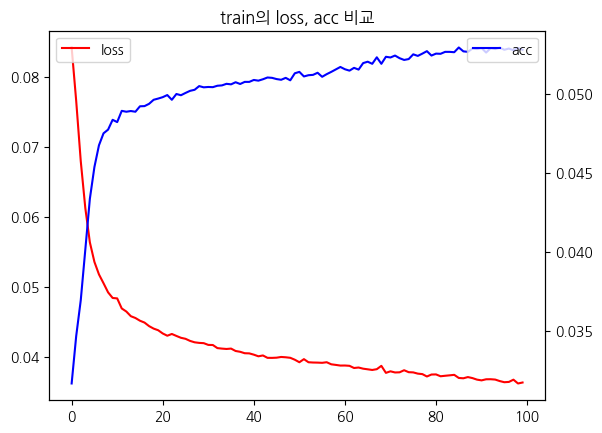

In [102]:
### Loss와 Acc F1 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1 = plt.subplots()
ax1.plot(train_['loss'], label='loss', color='red')

ax2 = ax1.twinx()
ax2.plot(train_['acc'], label='acc', color='blue')

# ax3 = ax1.twinx()
# ax3.plot(train_['f1'], label='f1', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('train의 loss, acc 비교')

plt.show()

### sklearn으로 모델 학습해보자.
좋은 결과의 모델을 만들 수 있음을 확인함